<a href="https://colab.research.google.com/github/amruthkumarp/Regression_model/blob/main/Buliding_linear_regression_scarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

**Y=wx+b**

y=Dependent variable

x=independent variable

w=weight

b=bias

Gradient Descent

Gradient Descent is an Optimization model used to minimize the loss function in various machine learning algorith.it is used for uodating thr parameter of the learning model

w=w-a*dw;

b=b-a*db;

Learning data

Learning rate is a function parameter in an optimizatiion algorithm thet determines the step size at each iteration while moving toward a minimum of loss function



Learning rate



In [6]:
import numpy as np
import pandas as pd


In [7]:
import numpy as np
import pandas as pd

class Linear_regression:
  #intiating the parameters (learning rate and num_iteration)
    def __init__(self,Learning_rate,num_iteration):
      self.Learning_rate=Learning_rate
      self.num_iteration=num_iteration

    def fit(self,x,y):
      #number of traing example and number of feature
      self.m,self.n=x.shape
      #intiating the weights and bias
      self.w=np.zeros(self.n)
      self.b=0
      self.x=x
      self.y=y
      #implementing gradient descent

      for i in range(self.num_iteration):
        # Corrected the method call from update_weights to update_weight
        self.update_weight()

    def update_weight(self):
      # Corrected the method call self.predict(self,x) to self.predict(self.x)
      y_prediction=self.predict(self.x)
      #calculate gradient
      # Corrected the variable name y_Prediction to y_prediction
      dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
      # Corrected the variable name dp to db
      db=-2*np.sum(self.y-y_prediction)/self.m
      #updating weights
      self.w=self.w-self.Learning_rate*dw
      # Corrected the variable name db to self.b in the update step
      self.b=self.b-self.Learning_rate*db

    def predict(self,x):
      return x.dot(self.w)+self.b

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
 data_url = "http://lib.stat.cmu.edu/datasets/boston"
 raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
 data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
 target = raw_df.values[1::2, 2]

In [13]:
print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [14]:
print(data.shape)

(506, 13)


In [15]:
print(target.shape)

(506,)


data preprocessing

In [18]:
#checking for missing value
salary_data.isnull().sum()

NameError: name 'salary_data' is not defined

In [19]:
#spliting the feature and target
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
print(x)
print(x.shape)
print(y)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

traning linear regression model

In [ ]:
model=Linear_regression(Learning_rate=0.02,num_iteration=1000)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
#printing the parameter value
print('weight=',model.w[0])
print('bais=',model.b)

In [ ]:
y=9514.400999035135*10.3+23697.406507136307
print(y)

predicted salary value for a test data

In [ ]:
test_data_prediction=model.predict(x_test)
print(test_data_prediction)
print(x_test)
print(y_test)

visulazation


In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_prediction,color='blue')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

print("intercept:",model1.intercept_)
print("slope:",model1.coef_)

#pridect
y_pred=model1.predict(x_test)
print(y_pred)

Final θ values:
θ0 (intercept): 5.2222
θ1 (slope)    : 1.9685


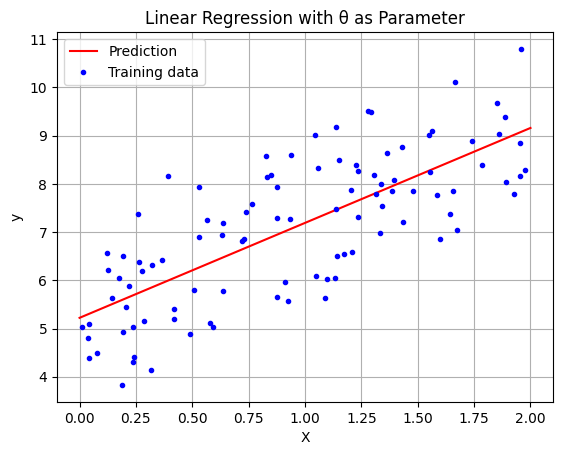

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100 points between 0 and 2
y = 5 + 2 * X + np.random.randn(100, 1)  # y = 5 + 2x + noise

# Step 2: Add bias term (x0 = 1) to feature matrix
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Shape: (100, 2)

# Step 3: Initialize theta
theta = np.random.randn(2, 1)  # Random initial theta

# Step 4: Set hyperparameters
learning_rate = 0.1
iterations = 1000
m = len(X_b)  # Number of samples

# Step 5: Gradient Descent
for i in range(iterations):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - learning_rate * gradients

# Step 6: Show result
print("Final θ values:")
print(f"θ0 (intercept): {theta[0][0]:.4f}")
print(f"θ1 (slope)    : {theta[1][0]:.4f}")

# Step 7: Plot the regression line
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta

plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.", label="Training data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with θ as Parameter")
plt.legend()
plt.grid(True)
plt.show()